In [1]:
import os
import math
import pickle

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import sklearn.metrics as metrics

from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import ParameterGrid
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.inspection import permutation_importance
from sklearn.impute import KNNImputer

from numpy import load

from xgboost import XGBClassifier

%matplotlib inline
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

rd_seed = 333

# Načtení dat

In [2]:
path_file = os.sep.join(['created_data', 'matrix_semestr_5.csv'])
matrix_bak = pd.read_csv(path_file, sep=",")

# Info o datasetu

In [3]:
matrix_bak.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1140 entries, 0 to 1139
Data columns (total 38 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   studium_id               1140 non-null   int64  
 1   dokoncil_semestr         1140 non-null   float64
 2   BI-PA1_znamka            1140 non-null   float64
 3   BI-PA1_poradi_zapisu     1140 non-null   float64
 4   BI-PAI_znamka            1140 non-null   float64
 5   BI-PAI_poradi_zapisu     1140 non-null   float64
 6   BI-CAO_znamka            1140 non-null   float64
 7   BI-CAO_poradi_zapisu     1140 non-null   float64
 8   BI-PS1_znamka            1140 non-null   float64
 9   BI-PS1_poradi_zapisu     1140 non-null   float64
 10  BI-MLO_znamka            1140 non-null   float64
 11  BI-MLO_poradi_zapisu     1140 non-null   float64
 12  BI-ZMA_znamka            1140 non-null   float64
 13  BI-ZMA_poradi_zapisu     1140 non-null   float64
 14  pocet_kreditu_semestr_1 

In [4]:
matrix_bak.mean()

studium_id                 1.431253e+07
dokoncil_semestr           9.745614e-01
BI-PA1_znamka              2.106579e+00
BI-PA1_poradi_zapisu       1.103509e+00
BI-PAI_znamka              2.242982e+00
BI-PAI_poradi_zapisu       1.009649e+00
BI-CAO_znamka              1.166228e+00
BI-CAO_poradi_zapisu       1.004386e+00
BI-PS1_znamka              2.187281e+00
BI-PS1_poradi_zapisu       1.105263e+00
BI-MLO_znamka              1.958333e+00
BI-MLO_poradi_zapisu       1.061404e+00
BI-ZMA_znamka              2.033333e+00
BI-ZMA_poradi_zapisu       1.101754e+00
pocet_kreditu_semestr_1    2.709123e+01
BI-PA2_znamka              2.041667e+00
BI-PA2_poradi_zapisu       1.221053e+00
BI-DBS_znamka              1.769737e+00
BI-DBS_poradi_zapisu       1.007018e+00
BI-SAP_znamka              1.645175e+00
BI-SAP_poradi_zapisu       1.014035e+00
BI-LIN_znamka              2.450000e+00
BI-LIN_poradi_zapisu       1.246491e+00
pocet_kreditu_semestr_2    2.515000e+01
BI-AAG_znamka              2.246930e+00


# Příprava datasetu

## Nastavení indexu

In [5]:
matrix_bak = matrix_bak.set_index(['studium_id'])

## Nastavení atributů na kategorické - ordinální

In [6]:
# ordinální
grades_category = pd.api.types.CategoricalDtype(categories=[-1, 1, 1.5, 2, 2.5, 3, 4], ordered=True)
# BI-PA1
matrix_bak['BI-PA1_znamka'] = matrix_bak['BI-PA1_znamka'].astype(grades_category)
# BI-PAI
matrix_bak['BI-PAI_znamka'] = matrix_bak['BI-PAI_znamka'].astype(grades_category)
# BI-CAO
matrix_bak['BI-CAO_znamka'] = matrix_bak['BI-CAO_znamka'].astype(grades_category)
# BI-PS1
matrix_bak['BI-PS1_znamka'] = matrix_bak['BI-PS1_znamka'].astype(grades_category)
# BI-MLO
matrix_bak['BI-MLO_znamka'] = matrix_bak['BI-MLO_znamka'].astype(grades_category)
# BI-ZMA
matrix_bak['BI-ZMA_znamka'] = matrix_bak['BI-ZMA_znamka'].astype(grades_category)
# BI-PA2
matrix_bak['BI-PA2_znamka'] = matrix_bak['BI-PA2_znamka'].astype(grades_category)
# BI-DBS
matrix_bak['BI-DBS_znamka'] = matrix_bak['BI-DBS_znamka'].astype(grades_category)
# BI-SAP
matrix_bak['BI-SAP_znamka'] = matrix_bak['BI-SAP_znamka'].astype(grades_category)
# BI-LIN
matrix_bak['BI-LIN_znamka'] = matrix_bak['BI-LIN_znamka'].astype(grades_category)
# BI-AG1
matrix_bak['BI-AG1_znamka'] = matrix_bak['BI-AG1_znamka'].astype(grades_category)
# BI-AAG
matrix_bak['BI-AAG_znamka'] = matrix_bak['BI-AAG_znamka'].astype(grades_category)
# BI-ZDM
matrix_bak['BI-ZDM_znamka'] = matrix_bak['BI-ZDM_znamka'].astype(grades_category)
# BI-OSY
matrix_bak['BI-OSY_znamka'] = matrix_bak['BI-OSY_znamka'].astype(grades_category)
# BI-PSI
matrix_bak['BI-PSI_znamka'] = matrix_bak['BI-PSI_znamka'].astype(grades_category)
# BI-BEZ
matrix_bak['BI-BEZ_znamka'] = matrix_bak['BI-BEZ_znamka'].astype(grades_category)

In [7]:
matrix_bak.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1140 entries, 14267106 to 17376606
Data columns (total 37 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   dokoncil_semestr         1140 non-null   float64 
 1   BI-PA1_znamka            1140 non-null   category
 2   BI-PA1_poradi_zapisu     1140 non-null   float64 
 3   BI-PAI_znamka            1140 non-null   category
 4   BI-PAI_poradi_zapisu     1140 non-null   float64 
 5   BI-CAO_znamka            1140 non-null   category
 6   BI-CAO_poradi_zapisu     1140 non-null   float64 
 7   BI-PS1_znamka            1140 non-null   category
 8   BI-PS1_poradi_zapisu     1140 non-null   float64 
 9   BI-MLO_znamka            1140 non-null   category
 10  BI-MLO_poradi_zapisu     1140 non-null   float64 
 11  BI-ZMA_znamka            1140 non-null   category
 12  BI-ZMA_poradi_zapisu     1140 non-null   float64 
 13  pocet_kreditu_semestr_1  1140 non-null   float64 
 1

# Modelování

## Rozdělení datasetu

In [8]:
Xdata = matrix_bak.drop(columns='dokoncil_semestr')
ydata = matrix_bak.dokoncil_semestr

In [9]:
Xtrain, Xtest, ytrain, ytest = train_test_split(Xdata, ydata, test_size=0.2, random_state=rd_seed, stratify=ydata, shuffle=True) 
print()
print("původní data")
display(Xdata.shape)
display(ydata.shape)
print()
print("rozložení hodnot")
display(ydata.value_counts())
display(ytrain.value_counts(normalize=True))
print()
print("trénovací data")
display(Xtrain.shape)
display(ytrain.shape)
print()
print("rozložení hodnot")
display(ytrain.value_counts())
display(ytrain.value_counts(normalize=True))
print()
print("testovací data")
display(Xtest.shape)
display(ytest.shape)
print()
print("rozložení hodnot")
display(ytest.value_counts())
display(ytest.value_counts(normalize=True))


původní data


(1140, 36)

(1140,)


rozložení hodnot


1.0    1111
0.0      29
Name: dokoncil_semestr, dtype: int64

1.0    0.974781
0.0    0.025219
Name: dokoncil_semestr, dtype: float64


trénovací data


(912, 36)

(912,)


rozložení hodnot


1.0    889
0.0     23
Name: dokoncil_semestr, dtype: int64

1.0    0.974781
0.0    0.025219
Name: dokoncil_semestr, dtype: float64


testovací data


(228, 36)

(228,)


rozložení hodnot


1.0    222
0.0      6
Name: dokoncil_semestr, dtype: int64

1.0    0.973684
0.0    0.026316
Name: dokoncil_semestr, dtype: float64

## Funkce pro vybrání vhodných hyperparametrů pomocí křížové validace

In [10]:
def get_best_parameters(param_grid, classifier, xgb=None):
    score = 'precision'
    if xgb:
        model = GridSearchCV(classifier(eval_metric='mlogloss', use_label_encoder=False, tree_method="gpu_hist", enable_categorical=True), param_grid, cv=5, scoring=score)
    else:
        model = GridSearchCV(classifier(), param_grid, cv=5, scoring=score)
    model.fit(Xtrain, ytrain)

    print('Best hyper-parameters are: ')
    print(model.best_params_)
    print()

    means = model.cv_results_["mean_test_score"]
    stds = model.cv_results_["std_test_score"]
    for mean, std, params in zip(means, stds, model.cv_results_["params"]):
        print("%0.6f (+/-%0.06f) for %r" % (mean, std * 2, params))
    print()
    return model

## Rozhodovací strom

In [11]:
param_grid = [
    {'criterion':['gini','entropy'],
    'max_depth': range(2,7),
    'min_samples_leaf':[10]}
]

In [12]:
dt = get_best_parameters(param_grid, DecisionTreeClassifier)

Best hyper-parameters are: 
{'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 10}

0.974785 (+/-0.005287) for {'criterion': 'gini', 'max_depth': 2, 'min_samples_leaf': 10}
0.974785 (+/-0.005287) for {'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 10}
0.975704 (+/-0.005096) for {'criterion': 'gini', 'max_depth': 4, 'min_samples_leaf': 10}
0.976767 (+/-0.007982) for {'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 10}
0.976767 (+/-0.007982) for {'criterion': 'gini', 'max_depth': 6, 'min_samples_leaf': 10}
0.974785 (+/-0.005287) for {'criterion': 'entropy', 'max_depth': 2, 'min_samples_leaf': 10}
0.974785 (+/-0.005287) for {'criterion': 'entropy', 'max_depth': 3, 'min_samples_leaf': 10}
0.974785 (+/-0.005287) for {'criterion': 'entropy', 'max_depth': 4, 'min_samples_leaf': 10}
0.974725 (+/-0.005387) for {'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 10}
0.974725 (+/-0.005387) for {'criterion': 'entropy', 'max_depth': 6, 'min_samples_leaf': 10}



In [13]:
dt.predict(Xtest)

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1.

### Výsledky modelu na trénovacím a testovacím datasetu

In [14]:
print('accuracy score (train): {0:.6f}'.format(metrics.accuracy_score(ytrain, dt.predict(Xtrain))))
print('accuracy score (test): {0:.6f}'.format(metrics.accuracy_score(ytest, dt.predict(Xtest))))

accuracy score (train): 0.974781
accuracy score (test): 0.973684


### Důležitost jednotlivých příznaků

In [15]:
feature_importances=pd.DataFrame({'features':Xtrain.columns,'feature_importance':dt.best_estimator_.feature_importances_})
feature_importances.sort_values('feature_importance',ascending=False)

,features,feature_importance
33,BI-BEZ_znamka,0.326952
12,pocet_kreditu_semestr_1,0.324524
28,pocet_kreditu_semestr_3,0.113663
24,BI-ZDM_znamka,0.093402
15,BI-DBS_znamka,0.060929
35,pocet_kreditu_semestr_4,0.047880
26,BI-AG1_znamka,0.016068
2,BI-PAI_znamka,0.014817
10,BI-ZMA_znamka,0.001765
29,BI-OSY_znamka,0.000000


### Vytvořený rozhodovací strom

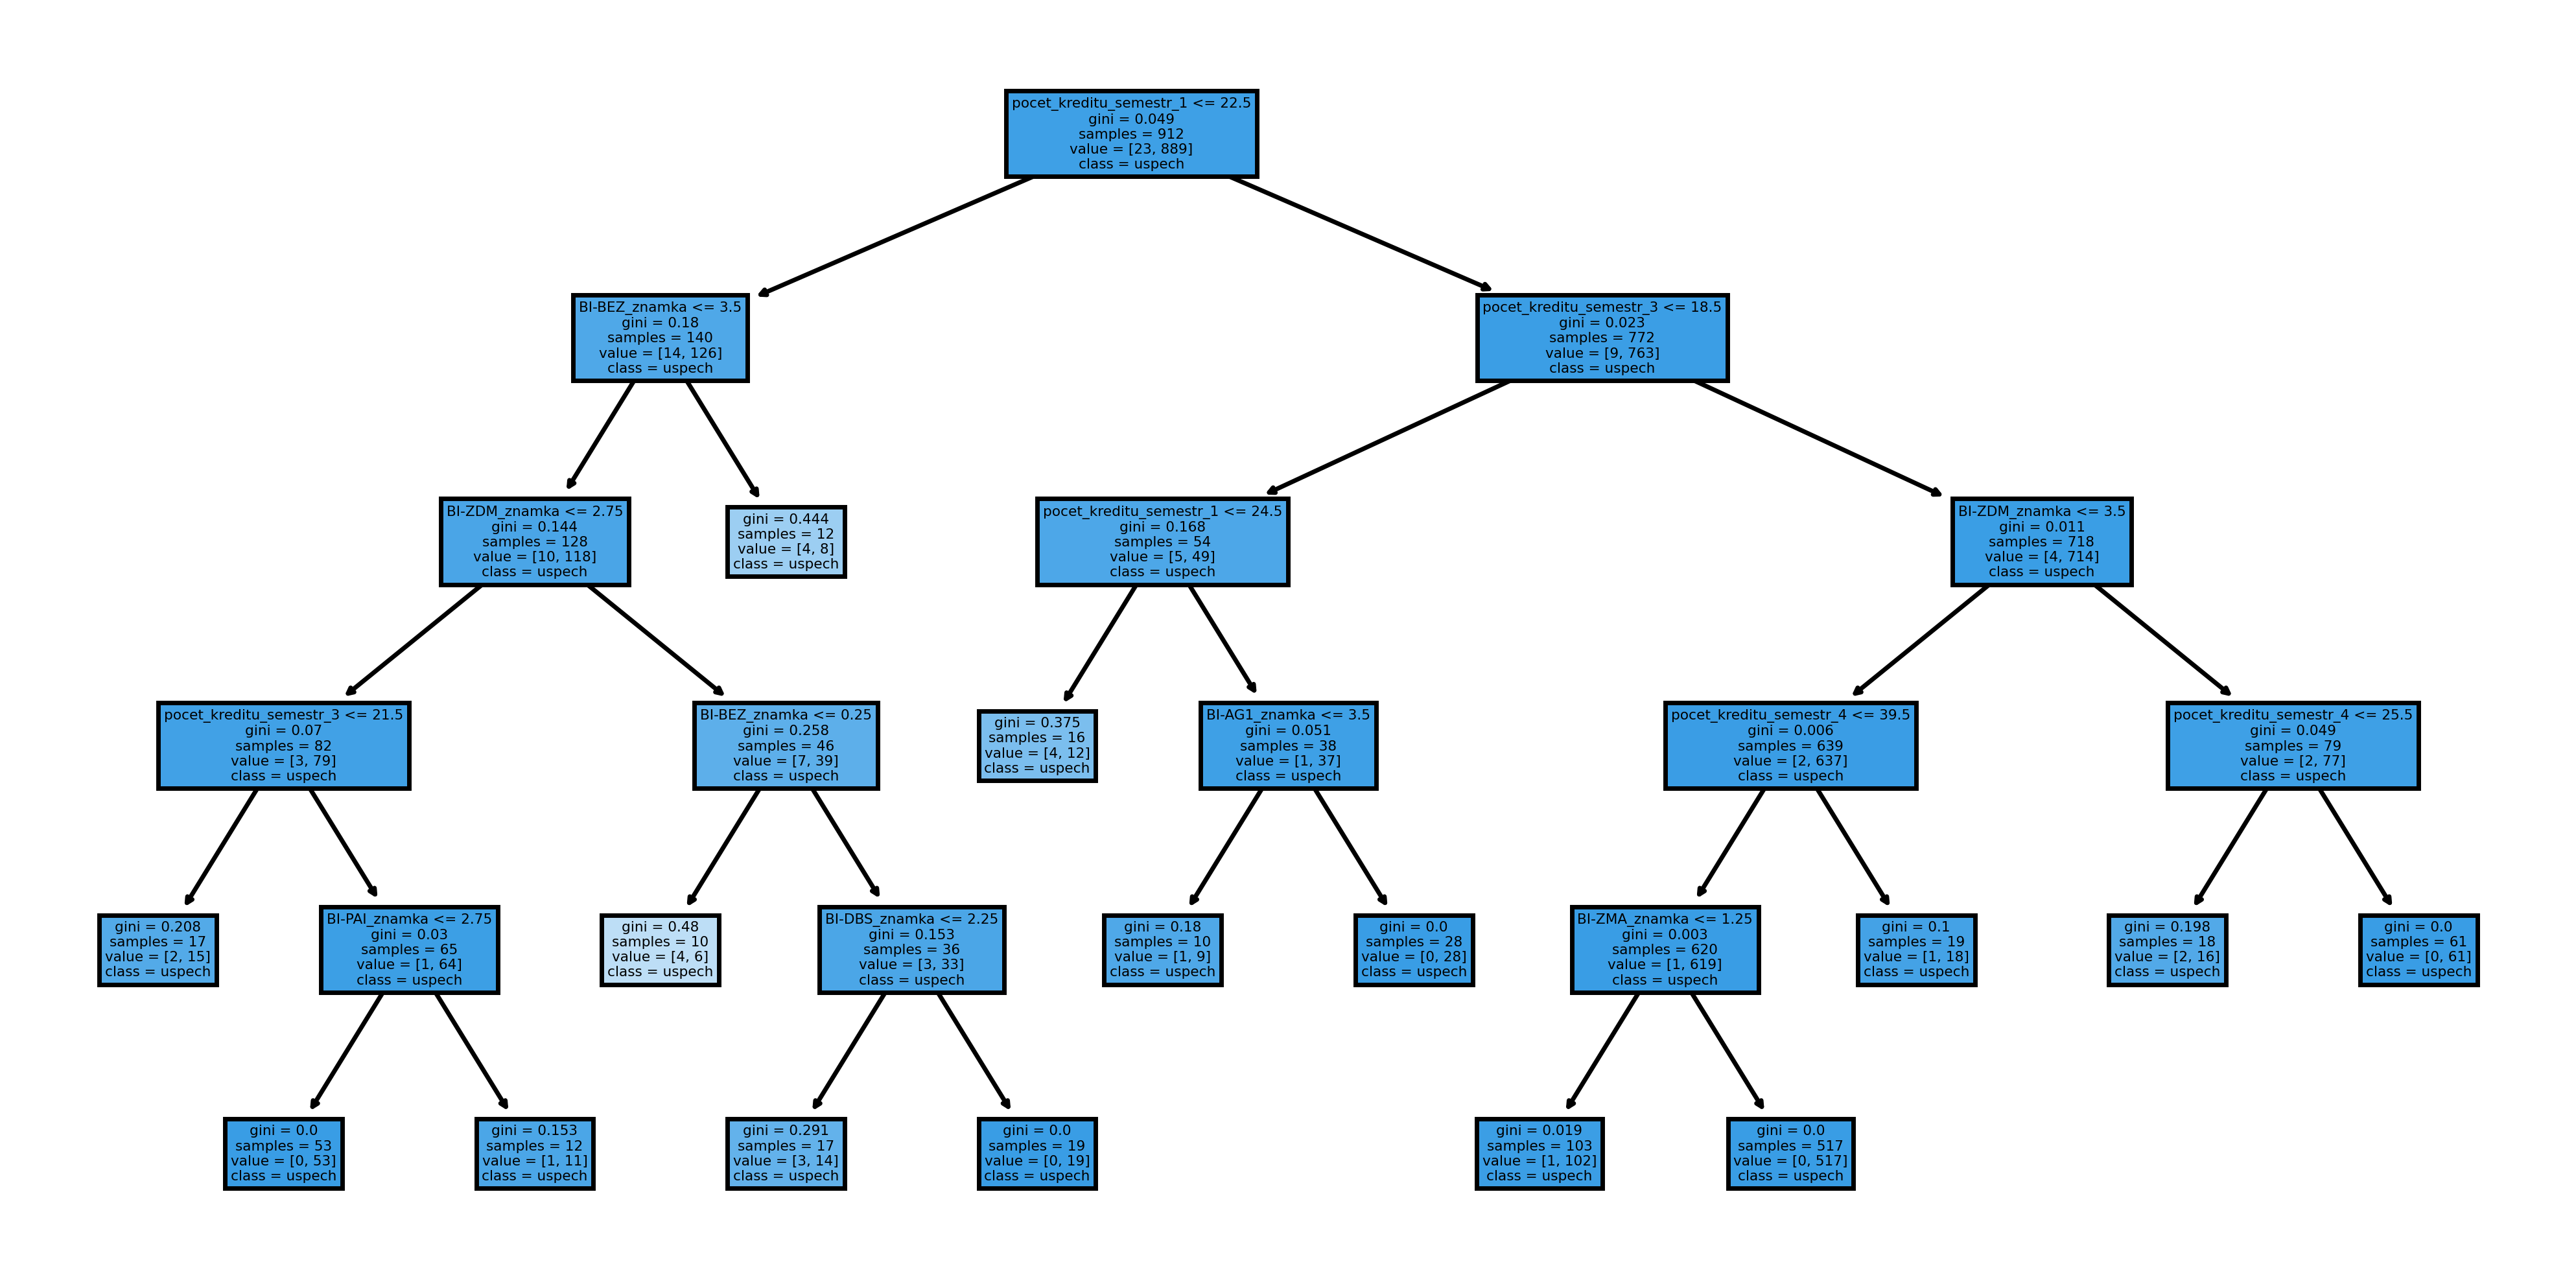

In [16]:
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (10,5), dpi=500)
tree.plot_tree(dt.best_estimator_,
               feature_names = Xdata.columns, 
               class_names=['neuspech', 'uspech'],
               filled = True);
path_file = os.sep.join(['decision_trees', 'tree_f1_semestr5.png'])
fig.savefig(path_file)

## Random forest

In [17]:
param_grid_rf = {
    'criterion':['gini','entropy'],
    'n_estimators': range(5, 50, 5),
    'max_depth': range(2, 4),
    'max_features': ['sqrt', 'log2', None],
    'min_samples_leaf':[10]
}

In [18]:
rf = get_best_parameters(param_grid_rf, RandomForestClassifier)

Best hyper-parameters are: 
{'criterion': 'gini', 'max_depth': 2, 'max_features': 'sqrt', 'min_samples_leaf': 10, 'n_estimators': 5}

0.974785 (+/-0.005287) for {'criterion': 'gini', 'max_depth': 2, 'max_features': 'sqrt', 'min_samples_leaf': 10, 'n_estimators': 5}
0.974785 (+/-0.005287) for {'criterion': 'gini', 'max_depth': 2, 'max_features': 'sqrt', 'min_samples_leaf': 10, 'n_estimators': 10}
0.974785 (+/-0.005287) for {'criterion': 'gini', 'max_depth': 2, 'max_features': 'sqrt', 'min_samples_leaf': 10, 'n_estimators': 15}
0.974785 (+/-0.005287) for {'criterion': 'gini', 'max_depth': 2, 'max_features': 'sqrt', 'min_samples_leaf': 10, 'n_estimators': 20}
0.974785 (+/-0.005287) for {'criterion': 'gini', 'max_depth': 2, 'max_features': 'sqrt', 'min_samples_leaf': 10, 'n_estimators': 25}
0.974785 (+/-0.005287) for {'criterion': 'gini', 'max_depth': 2, 'max_features': 'sqrt', 'min_samples_leaf': 10, 'n_estimators': 30}
0.974785 (+/-0.005287) for {'criterion': 'gini', 'max_depth': 2, 'max

In [19]:
rf.predict(Xtest)

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1.

### Výsledky modelu na trénovacím a testovacím datasetu

In [20]:
print('accuracy score (train): {0:.6f}'.format(metrics.accuracy_score(ytrain, rf.predict(Xtrain))))
print('accuracy score (test): {0:.6f}'.format(metrics.accuracy_score(ytest, rf.predict(Xtest))))

accuracy score (train): 0.974781
accuracy score (test): 0.973684


### Důležitost jednotlivých příznaků

In [21]:
feature_importances=pd.DataFrame({'features':Xtrain.columns,'feature_importance':rf.best_estimator_.feature_importances_})
feature_importances.sort_values('feature_importance',ascending=False)

,features,feature_importance
33,BI-BEZ_znamka,0.261198
35,pocet_kreditu_semestr_4,0.196873
12,pocet_kreditu_semestr_1,0.162977
21,pocet_kreditu_semestr_2,0.080162
24,BI-ZDM_znamka,0.072787
29,BI-OSY_znamka,0.062379
17,BI-SAP_znamka,0.055022
22,BI-AAG_znamka,0.052769
10,BI-ZMA_znamka,0.044528
4,BI-CAO_znamka,0.011305


## Adaboost

In [22]:
param_grid_ab = {
    'n_estimators': range(5, 50, 5),
    'learning_rate': np.arange(0.1, 1., 0.1)
}

In [23]:
ab = get_best_parameters(param_grid_ab, AdaBoostClassifier)

Best hyper-parameters are: 
{'learning_rate': 0.7000000000000001, 'n_estimators': 45}

0.974785 (+/-0.005287) for {'learning_rate': 0.1, 'n_estimators': 5}
0.974785 (+/-0.005287) for {'learning_rate': 0.1, 'n_estimators': 10}
0.974785 (+/-0.005287) for {'learning_rate': 0.1, 'n_estimators': 15}
0.974785 (+/-0.005287) for {'learning_rate': 0.1, 'n_estimators': 20}
0.974785 (+/-0.005287) for {'learning_rate': 0.1, 'n_estimators': 25}
0.974785 (+/-0.005287) for {'learning_rate': 0.1, 'n_estimators': 30}
0.974785 (+/-0.005287) for {'learning_rate': 0.1, 'n_estimators': 35}
0.974785 (+/-0.005287) for {'learning_rate': 0.1, 'n_estimators': 40}
0.974785 (+/-0.005287) for {'learning_rate': 0.1, 'n_estimators': 45}
0.974785 (+/-0.005287) for {'learning_rate': 0.2, 'n_estimators': 5}
0.974785 (+/-0.005287) for {'learning_rate': 0.2, 'n_estimators': 10}
0.974785 (+/-0.005287) for {'learning_rate': 0.2, 'n_estimators': 15}
0.974785 (+/-0.005287) for {'learning_rate': 0.2, 'n_estimators': 20}
0.974

In [24]:
ab.predict(Xtest)

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1.

### Výsledky modelu na trénovacím a testovacím datasetu

In [25]:
print('accuracy score (train): {0:.6f}'.format(metrics.accuracy_score(ytrain, ab.predict(Xtrain))))
print('accuracy score (test): {0:.6f}'.format(metrics.accuracy_score(ytest, ab.predict(Xtest))))

accuracy score (train): 0.982456
accuracy score (test): 0.978070


### Důležitost jednotlivých příznaků

In [26]:
feature_importances=pd.DataFrame({'features':Xtrain.columns,'feature_importance':ab.best_estimator_.feature_importances_})
feature_importances.sort_values('feature_importance',ascending=False)

,features,feature_importance
12,pocet_kreditu_semestr_1,0.133333
28,pocet_kreditu_semestr_3,0.133333
35,pocet_kreditu_semestr_4,0.111111
13,BI-PA2_znamka,0.088889
33,BI-BEZ_znamka,0.066667
0,BI-PA1_znamka,0.066667
2,BI-PAI_znamka,0.066667
24,BI-ZDM_znamka,0.044444
19,BI-LIN_znamka,0.044444
10,BI-ZMA_znamka,0.044444


## Xgboost

In [27]:
param_grid = {
    'eta': np.arange(0.1, 1., 0.1),
    'max_depth': range(3, 8)
}
param_comb = ParameterGrid(param_grid)

In [28]:
xgb = get_best_parameters(param_grid, XGBClassifier, True)

Best hyper-parameters are: 
{'eta': 0.8, 'max_depth': 4}

0.974664 (+/-0.005488) for {'eta': 0.1, 'max_depth': 3}
0.974695 (+/-0.005434) for {'eta': 0.1, 'max_depth': 4}
0.974671 (+/-0.005375) for {'eta': 0.1, 'max_depth': 5}
0.974671 (+/-0.005375) for {'eta': 0.1, 'max_depth': 6}
0.974671 (+/-0.005375) for {'eta': 0.1, 'max_depth': 7}
0.974671 (+/-0.005375) for {'eta': 0.2, 'max_depth': 3}
0.974671 (+/-0.005375) for {'eta': 0.2, 'max_depth': 4}
0.974677 (+/-0.005265) for {'eta': 0.2, 'max_depth': 5}
0.974671 (+/-0.005375) for {'eta': 0.2, 'max_depth': 6}
0.974671 (+/-0.005375) for {'eta': 0.2, 'max_depth': 7}
0.974701 (+/-0.005325) for {'eta': 0.30000000000000004, 'max_depth': 3}
0.974677 (+/-0.005265) for {'eta': 0.30000000000000004, 'max_depth': 4}
0.974671 (+/-0.005375) for {'eta': 0.30000000000000004, 'max_depth': 5}
0.974640 (+/-0.005425) for {'eta': 0.30000000000000004, 'max_depth': 6}
0.974640 (+/-0.005425) for {'eta': 0.30000000000000004, 'max_depth': 7}
0.974671 (+/-0.005375)

In [29]:
xgb.predict(Xtest)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1])

### Výsledky modelu na trénovacím a testovacím datasetu

In [30]:
print('accuracy score XGBoost (train): {0:.6f}'.format(metrics.accuracy_score(ytrain, xgb.predict(Xtrain))))
print('accuracy score XGBoost (val): {0:.6f}'.format(metrics.accuracy_score(ytest, xgb.predict(Xtest))))

accuracy score XGBoost (train): 1.000000
accuracy score XGBoost (val): 0.973684


### Důležitost jednotlivých příznaků

In [31]:
feat_imp = pd.Series(xgb.best_estimator_.get_booster().get_fscore()).sort_values(ascending=False)

In [32]:
feat_imp

pocet_kreditu_semestr_3    20.0
BI-CAO_znamka              17.0
pocet_kreditu_semestr_2    16.0
BI-AG1_znamka              13.0
pocet_kreditu_semestr_1    13.0
BI-OSY_znamka              13.0
pocet_kreditu_semestr_4    12.0
BI-AAG_znamka              12.0
BI-PA1_znamka              12.0
BI-PA2_poradi_zapisu       11.0
BI-ZDM_znamka              10.0
BI-MLO_znamka              10.0
BI-LIN_znamka              10.0
BI-PA2_znamka              10.0
BI-ZMA_znamka               9.0
BI-SAP_znamka               9.0
BI-PAI_znamka               8.0
BI-ZMA_poradi_zapisu        8.0
BI-DBS_znamka               7.0
BI-PSI_znamka               6.0
BI-PS1_znamka               6.0
BI-BEZ_znamka               6.0
BI-LIN_poradi_zapisu        5.0
BI-OSY_poradi_zapisu        4.0
BI-PS1_poradi_zapisu        3.0
BI-PA1_poradi_zapisu        3.0
BI-AG1_poradi_zapisu        2.0
BI-MLO_poradi_zapisu        2.0
BI-BEZ_poradi_zapisu        1.0
dtype: float64

## MLP

In [33]:
mlp = MLPClassifier(random_state=1, max_iter=500).fit(Xtrain, ytrain)

In [34]:
mlp.predict(Xtest)

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1.

### Výsledky modelu na trénovacím a testovacím datasetu

In [35]:
print('accuracy score mlp (train): {0:.6f}'.format(metrics.accuracy_score(ytrain, mlp.predict(Xtrain))))
print('accuracy score mlp (val): {0:.6f}'.format(metrics.accuracy_score(ytest, mlp.predict(Xtest))))

accuracy score mlp (train): 0.994518
accuracy score mlp (val): 0.973684


## kNN

In [36]:
param_grid = {
    'n_neighbors' : range(1, 12), # Počet nejbližších sousedů
    'p': range(1, 3), # Stupeň Minkowského vzdálenosti
    'weights': ['uniform', 'distance'], # Aritmetický, nebo vážený průměr
}
param_comb = ParameterGrid(param_grid)

In [37]:
knn = get_best_parameters(param_grid, KNeighborsClassifier)

Best hyper-parameters are: 
{'n_neighbors': 2, 'p': 2, 'weights': 'uniform'}

0.977430 (+/-0.007143) for {'n_neighbors': 1, 'p': 1, 'weights': 'uniform'}
0.977430 (+/-0.007143) for {'n_neighbors': 1, 'p': 1, 'weights': 'distance'}
0.976290 (+/-0.004700) for {'n_neighbors': 1, 'p': 2, 'weights': 'uniform'}
0.976290 (+/-0.004700) for {'n_neighbors': 1, 'p': 2, 'weights': 'distance'}
0.978091 (+/-0.011218) for {'n_neighbors': 2, 'p': 1, 'weights': 'uniform'}
0.977379 (+/-0.007145) for {'n_neighbors': 2, 'p': 1, 'weights': 'distance'}
0.979060 (+/-0.011723) for {'n_neighbors': 2, 'p': 2, 'weights': 'uniform'}
0.976290 (+/-0.004700) for {'n_neighbors': 2, 'p': 2, 'weights': 'distance'}
0.974664 (+/-0.005492) for {'n_neighbors': 3, 'p': 1, 'weights': 'uniform'}
0.974664 (+/-0.005492) for {'n_neighbors': 3, 'p': 1, 'weights': 'distance'}
0.974695 (+/-0.005434) for {'n_neighbors': 3, 'p': 2, 'weights': 'uniform'}
0.974695 (+/-0.005434) for {'n_neighbors': 3, 'p': 2, 'weights': 'distance'}
0.97

In [38]:
knn.predict(Xtest)

array([1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1.

### Výsledky modelu na trénovacím a testovacím datasetu

In [39]:
print('accuracy score knn (train): {0:.6f}'.format(metrics.accuracy_score(ytrain, knn.predict(Xtrain))))
print('accuracy score knn (test): {0:.6f}'.format(metrics.accuracy_score(ytest, knn.predict(Xtest))))

accuracy score knn (train): 0.974781
accuracy score knn (test): 0.942982


# Výsledky

In [40]:
results = pd.DataFrame(columns=['vysledky'], index=['dt', 'rf', 'ab', 'xgb', 'mlp', 'knn'])

In [41]:
results.loc['dt', 'vysledky'] = round(metrics.accuracy_score(ytest, dt.predict(Xtest)), 3)
results.loc['rf', 'vysledky'] = round(metrics.accuracy_score(ytest, rf.predict(Xtest)), 3)
results.loc['ab', 'vysledky'] = round(metrics.accuracy_score(ytest, ab.predict(Xtest)), 3)
results.loc['xgb', 'vysledky'] = round(metrics.accuracy_score(ytest, xgb.predict(Xtest)), 3)
results.loc['mlp', 'vysledky'] = round(metrics.accuracy_score(ytest, mlp.predict(Xtest)), 3)
results.loc['knn', 'vysledky'] = round(metrics.accuracy_score(ytest, knn.predict(Xtest)), 3)

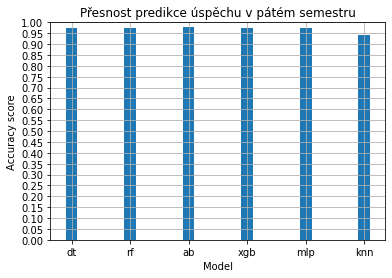

In [42]:
fig, ax = plt.subplots()
width = 0.2
ax.bar(results.index, results['vysledky'].values, width)

ax.set_ylabel('Accuracy score')
ax.set_xlabel('Model')
ax.set_title('Přesnost predikce úspěchu v pátém semestru')

ax.grid(True)
y_values = np.arange(0.0, 1.05, 0.05)
plt.ylim(ymin=0)
plt.ylim(ymax=1)
plt.yticks(y_values)
plt.show()

In [43]:
results

,vysledky
dt,0.974
rf,0.974
ab,0.978
xgb,0.974
mlp,0.974
knn,0.943


# Průzkum modelů, které nepredikovaly pouze neúspěch

## kNN

In [44]:
testovani_knn = pd.DataFrame(columns=['puvodni', 'predikovany'], index=ytest.index)
testovani_knn['puvodni'] = ytest.values
testovani_knn['predikovany'] = knn.predict(Xtest)

In [45]:
testovani_knn[(testovani_knn.puvodni == 0)
         & (testovani_knn.predikovany == 0)]

,puvodni,predikovany
studium_id,,
14805206,0.0,0.0


In [46]:
matrix_bak[matrix_bak.index == 14805206]

,dokoncil_semestr,BI-PA1_znamka,BI-PA1_poradi_zapisu,BI-PAI_znamka,BI-PAI_poradi_zapisu,BI-CAO_znamka,BI-CAO_poradi_zapisu,BI-PS1_znamka,BI-PS1_poradi_zapisu,BI-MLO_znamka,BI-MLO_poradi_zapisu,BI-ZMA_znamka,BI-ZMA_poradi_zapisu,pocet_kreditu_semestr_1,BI-PA2_znamka,BI-PA2_poradi_zapisu,BI-DBS_znamka,BI-DBS_poradi_zapisu,BI-SAP_znamka,BI-SAP_poradi_zapisu,BI-LIN_znamka,BI-LIN_poradi_zapisu,pocet_kreditu_semestr_2,BI-AAG_znamka,BI-AAG_poradi_zapisu,BI-ZDM_znamka,BI-ZDM_poradi_zapisu,BI-AG1_znamka,BI-AG1_poradi_zapisu,pocet_kreditu_semestr_3,BI-OSY_znamka,BI-OSY_poradi_zapisu,BI-PSI_znamka,BI-PSI_poradi_zapisu,BI-BEZ_znamka,BI-BEZ_poradi_zapisu,pocet_kreditu_semestr_4
studium_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
14805206,0.0,3.0,2.0,2.0,1.0,1.5,1.0,2.5,1.0,1.5,1.0,4.0,1.0,18.0,3.0,2.0,2.0,1.0,2.5,1.0,4.0,1.0,16.0,4.0,1.0,3.0,1.0,-1.0,-1.0,19.0,-1.0,-1.0,2.5,1.0,3.0,1.0,31.0


## AdaBoost

In [47]:
testovani_ab = pd.DataFrame(columns=['puvodni', 'predikovany'], index=ytest.index)
testovani_ab['puvodni'] = ytest.values
testovani_ab['predikovany'] = ab.predict(Xtest)

In [48]:
testovani_ab[(testovani_ab.puvodni == 0)
         & (testovani_ab.predikovany == 0)]

,puvodni,predikovany
studium_id,,
14301506,0.0,0.0


In [49]:
matrix_bak[matrix_bak.index == 14301506]

,dokoncil_semestr,BI-PA1_znamka,BI-PA1_poradi_zapisu,BI-PAI_znamka,BI-PAI_poradi_zapisu,BI-CAO_znamka,BI-CAO_poradi_zapisu,BI-PS1_znamka,BI-PS1_poradi_zapisu,BI-MLO_znamka,BI-MLO_poradi_zapisu,BI-ZMA_znamka,BI-ZMA_poradi_zapisu,pocet_kreditu_semestr_1,BI-PA2_znamka,BI-PA2_poradi_zapisu,BI-DBS_znamka,BI-DBS_poradi_zapisu,BI-SAP_znamka,BI-SAP_poradi_zapisu,BI-LIN_znamka,BI-LIN_poradi_zapisu,pocet_kreditu_semestr_2,BI-AAG_znamka,BI-AAG_poradi_zapisu,BI-ZDM_znamka,BI-ZDM_poradi_zapisu,BI-AG1_znamka,BI-AG1_poradi_zapisu,pocet_kreditu_semestr_3,BI-OSY_znamka,BI-OSY_poradi_zapisu,BI-PSI_znamka,BI-PSI_poradi_zapisu,BI-BEZ_znamka,BI-BEZ_poradi_zapisu,pocet_kreditu_semestr_4
studium_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
14301506,0.0,3.0,1.0,2.0,1.0,1.5,1.0,3.0,1.0,3.0,1.0,2.5,1.0,30.0,2.5,2.0,3.0,2.0,2.0,1.0,2.5,1.0,13.0,4.0,1.0,4.0,1.0,4.0,1.0,12.0,-1.0,-1.0,3.0,1.0,2.5,1.0,34.0
